In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats
import researchpy as rp

from statsmodels.formula.api import ols 

In [3]:
bike_sharing_data = pd.read_csv('datasets/bike_sharing_data_processed.csv')

bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [4]:
bike_sharing_data.shape

(731, 7)

In [5]:
bike_sharing_data['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [6]:
bike_sharing_data.groupby('weathersit')['cnt'].describe().T

weathersit,1,2,3
count,463.000000,247.000000,21.000000
mean,4876.786177,4035.862348,1803.285714
std,1879.483989,1809.109918,1240.284449
min,431.000000,605.000000,22.000000
25%,3636.500000,2674.500000,705.000000
50%,4844.000000,4040.000000,1817.000000
75%,6458.500000,5257.500000,2424.000000
max,8714.000000,8362.000000,4639.000000


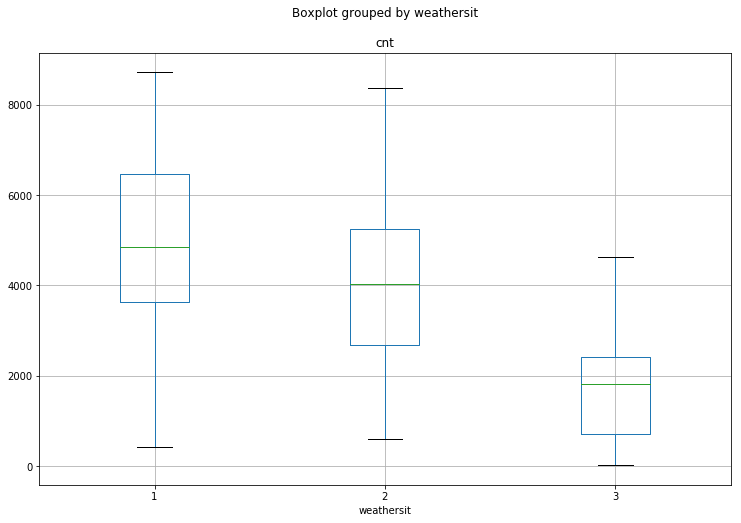

In [7]:
bike_sharing_data.boxplot(column=['cnt'], by='weathersit', figsize=(12, 8))

In [8]:
stats.f_oneway(bike_sharing_data['cnt'][bike_sharing_data['weathersit'] == 1],
               bike_sharing_data['cnt'][bike_sharing_data['weathersit'] == 2],
               bike_sharing_data['cnt'][bike_sharing_data['weathersit'] == 3],)

F_onewayResult(statistic=40.06604492024684, pvalue=3.106317270053755e-17)

In [9]:
result = ols('cnt ~ C(weathersit)', data = bike_sharing_data).fit()

In [10]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     40.07
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           3.11e-17
Time:                        21:44:47   Log-Likelihood:                -6531.5
No. Observations:                 731   AIC:                         1.307e+04
Df Residuals:                     728   BIC:                         1.308e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4876.7862     85

In [11]:
from statsmodels.stats.multicomp import MultiComparison

mul_com = MultiComparison(bike_sharing_data['cnt'], bike_sharing_data['weathersit'])

mul_result = mul_com.tukeyhsd()

print(mul_result)

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
group1 group2  meandiff    lower      upper    reject
-----------------------------------------------------
  1      2    -840.9238  -1181.639  -500.2086   True 
  1      3    -3073.5005 -4038.2706 -2108.7304  True 
  2      3    -2232.5766 -3215.4794 -1249.6738  True 
-----------------------------------------------------
